In [4]:
%load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline
import reinforcement_expm
import numpy as np
import tensorflow as tf
from agents import load_expm_params
import copy
from IPython.display import clear_output

def episode_finished_callback(runner):
    if runner.episodes % 10 == 0:
        clear_output(wait=True)
        print('Average reward at episode %d : %d' % (runner.episodes,np.mean(runner.episode_rewards[-100:])))
        print('Avg sample time is %f (ms)' % (1000*runner.avg_sample_time))
        print('Avg train time is %f (ms)' % ((runner.global_trains/runner.global_t)*(1000*runner.avg_train_time)))
                        
        plt.figure(figsize=[4,3])
        plt.plot(runner.episode_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Rewards')
        plt.show()
        plt.close()
        
reinforcement_expm.clear_logs() # Do some housekeeping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Average reward at episode 20 : -188
Avg sample time is 1.275798 (ms)
Avg train time is 0.915754 (ms)


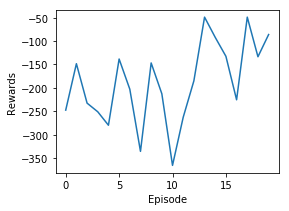

In [ ]:
algorithm = 'DQN'
expm_name = 'LunarLander'
runner = reinforcement_expm.run_expm(algorithm,expm_name,episode_finished_callback=episode_finished_callback)

In [ ]:
algorithm = 'PPO'
expm_name = 'LunarLander'
runner = reinforcement_expm.run_expm(algorithm,expm_name,episode_finished_callback=episode_finished_callback)

In [ ]:
runner.test(render=True,optimal_action=True)

In [ ]:
# algorithm = 'DQN'
# expm_name = 'LunarLander_Soft'

# # test_case_params = {
# #     'soft/huber' : dict(agent_params = dict(soft_learning = True,huber_loss=True)),
# #     'soft' : dict(agent_params = dict(soft_learning = True,huber_loss=False)),
# #     'dueling/boltz' : dict(agent_params = dict(soft_learning = False,dueling =True), policy_params = dict(action_choice = 'Boltzmann')),
# #     'boltz' : dict(agent_params = dict(soft_learning = False,dueling =False), policy_params = dict(action_choice = 'Boltzmann')),
# #     'epsilon' : dict(agent_params = dict(soft_learning = False,dueling =True), policy_params = dict(action_choice = 'Epsilon'))
# # }

# test_case_params = {
#     '32' : {'network_spec' : 2*[dict(type = 'dense',size=32)]},
#     '64' : {'network_spec' : 2*[dict(type = 'dense',size=64)]},
#     }


    
# rewards = reinforcement_expm.sweep_test_cases(algorithm,expm_name,test_case_params,runs_per_point = 2)

   